<a href="https://colab.research.google.com/github/Sg134-ch/Machine-Learning-Projects-/blob/main/ML_Predict_Term_Deposit_Subscription_Theory_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ All libraries imported successfully!
Configuration:
  data_file: bank.csv
  target_column: y
  test_size: 0.25
  threshold_1: 0.5
  threshold_2: None
  random_seed: 42
Upload your bank.csv file:


Saving bank.csv to bank (1).csv
✓ File uploaded: bank (1).csv

LOADING DATA
✓ Dataset shape: (4521, 17)

First few rows:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unkn

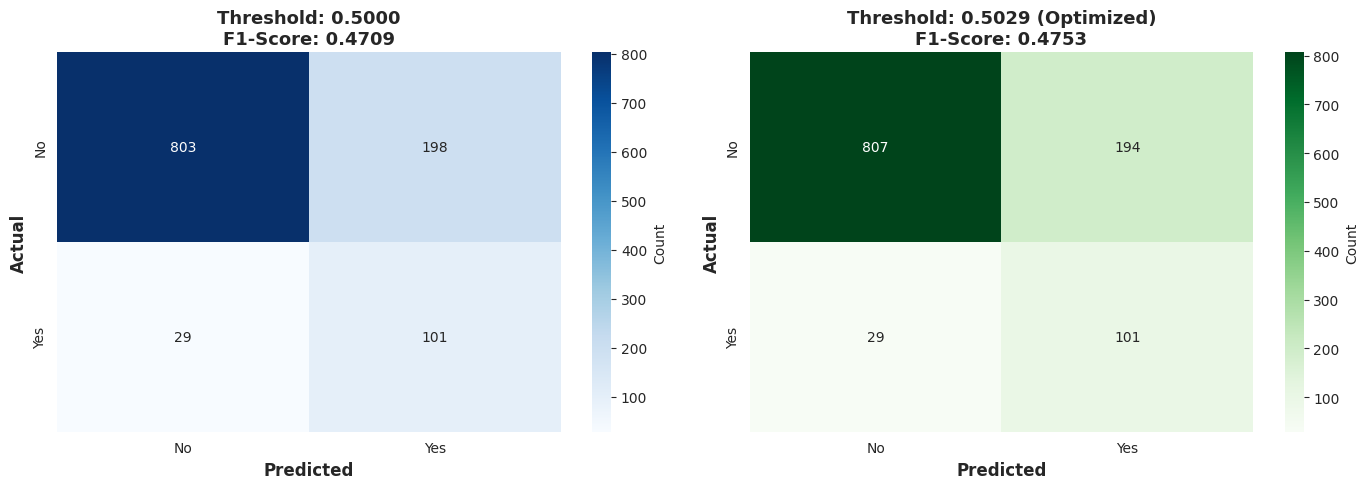

✓ Confusion matrices plotted and saved


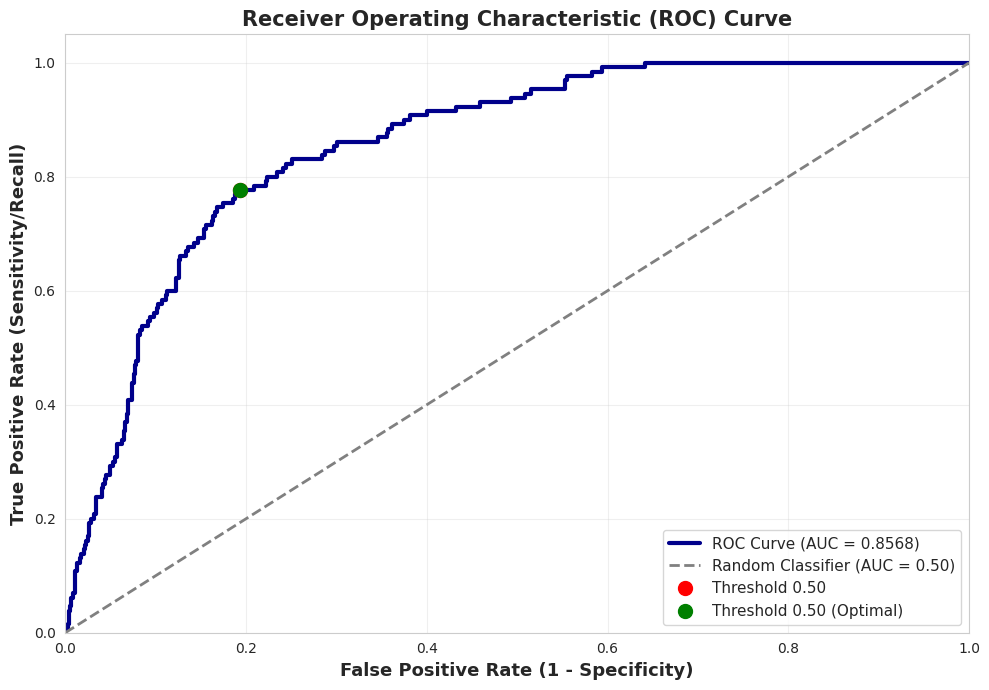

✓ ROC curve plotted and saved


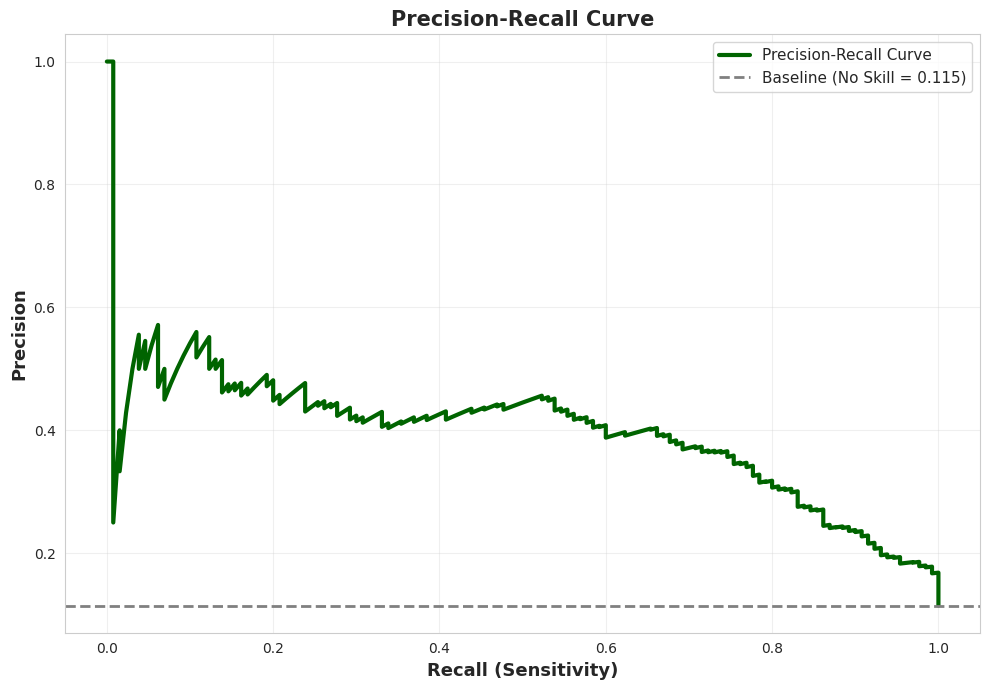

✓ Precision-Recall curve plotted and saved

TOP 10 MOST IMPORTANT FEATURES
  Feature  Coefficient  Abs_Coefficient
 duration     1.384439         1.384439
  contact    -0.523636         0.523636
 campaign    -0.451865         0.451865
  housing    -0.441071         0.441071
     loan    -0.382554         0.382554
 previous     0.322831         0.322831
    pdays     0.224688         0.224688
 poutcome     0.149480         0.149480
education     0.116570         0.116570
      age     0.115589         0.115589


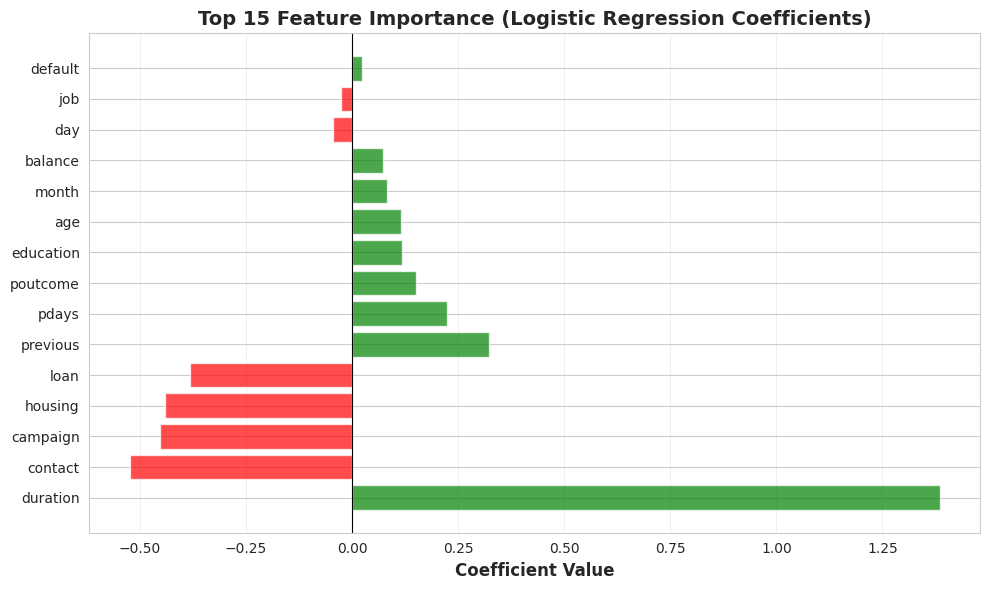

✓ Feature importance plotted and saved
✓ Predictions saved to 'probabilities.csv'

Sample predictions:
   RecordId  Probability(yes) PredictedLabel ActualLabel
0         0          0.270772             no          no
1         1          0.443156             no         yes
2         2          0.872880            yes          no
3         3          0.695767            yes          no
4         4          0.121338             no          no
5         5          0.685451            yes          no
6         6          0.065099             no          no
7         7          0.356673             no          no
8         8          0.483228             no          no
9         9          0.365951             no          no

DOWNLOADING FILES (Google Colab)
⬇️ Downloading probabilities.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading confusion_matrices.png...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading roc_curve.png...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading precision_recall_curve.png...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading feature_importance.png...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ All files downloaded to your computer!

KEY CONCEPTS EXPLAINED

┌──────────────────────────────────────────────────────────────────┐
│  WHY IS THE ROC CURVE USEFUL?                                   │
└──────────────────────────────────────────────────────────────────┘

1. THRESHOLD-INDEPENDENT EVALUATION
   • Shows model performance across ALL possible thresholds
   • Helps identify the best operating point for your business needs
   
2. VISUAL PERFORMANCE COMPARISON
   • Easy to compare different models at a glance
   • Diagonal line = random guessing (AUC = 0.5)
   • Perfect classifier touches top-left corner (AUC = 1.0)
   
3. AUC AS A SINGLE SUMMARY METRIC
   • Provides one number to quantify model quality
   • Higher AUC = better discrimination between classes
   • Independent of class distribution
   
4. BUSINESS DECISION MAKING
   • Shows trade-off between catching positives (TPR) and false alarms (FPR)
   • Helps choose threshold based on business costs and priorities


┌──

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ⬇️ Downloading: bank (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ⬇️ Downloading: probabilities.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


PNG Images:
  ⬇️ Downloading: confusion_matrices.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ⬇️ Downloading: precision_recall_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ⬇️ Downloading: roc_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ⬇️ Downloading: feature_importance.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Downloaded 7 file(s) successfully!
💡 Check your browser's download folder



In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_fscore_support
)
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("✓ All libraries imported successfully!")

CONFIG = {
    'data_file': 'bank.csv',           # Change to your file path
    'target_column': 'y',
    'test_size': 0.25,
    'threshold_1': 0.5,                # Standard threshold
    'threshold_2': None,               # Will be auto-calculated (optimal)
    'random_seed': 42
}

print("Configuration:")
for key, value in CONFIG.items():
    print(f"  {key}: {value}")

# OPTION 1: Upload file manually in Colab
from google.colab import files
print("Upload your bank.csv file:")
uploaded = files.upload()
CONFIG['data_file'] = list(uploaded.keys())[0]
print(f"✓ File uploaded: {CONFIG['data_file']}")

def load_data(filepath, target_col):
    """Load and perform initial exploration"""
    print(f"\n{'='*70}")
    print("LOADING DATA")
    print(f"{'='*70}")

    # Try different delimiters
    try:
        df = pd.read_csv(filepath, delimiter=';')
    except:
        df = pd.read_csv(filepath)

    print(f"✓ Dataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())

    print(f"\nColumn names:")
    print(df.columns.tolist())

    print(f"\nTarget distribution:")
    print(df[target_col].value_counts())

    print(f"\nData types:")
    print(df.dtypes)

    print(f"\nMissing values:")
    print(df.isnull().sum())

    return df

# Load the data
df = load_data(CONFIG['data_file'], CONFIG['target_column'])

def preprocess_data(df, target_col):
    """Preprocess and encode data"""
    print(f"\n{'='*70}")
    print("PREPROCESSING DATA")
    print(f"{'='*70}")

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Encode target variable
    y = (y == 'yes').astype(int)
    print(f"✓ Target encoded: 'yes'=1, 'no'=0")
    print(f"  Class distribution: {y.value_counts().to_dict()}")
    print(f"  Class balance: {y.mean():.2%} positive class")

    # Identify column types
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

    print(f"\n✓ Feature types identified:")
    print(f"  Categorical: {len(categorical_cols)} columns")
    print(f"    {categorical_cols}")
    print(f"  Numerical: {len(numerical_cols)} columns")
    print(f"    {numerical_cols}")

    # Encode categorical variables
    X_encoded = X.copy()
    label_encoders = {}

    for col in categorical_cols:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        print(f"  Encoded '{col}': {len(le.classes_)} unique values")

    print(f"\n✓ Encoding completed!")
    print(f"  Final feature matrix shape: {X_encoded.shape}")

    return X_encoded, y, categorical_cols, numerical_cols, label_encoders

# Preprocess the data
X, y, cat_cols, num_cols, encoders = preprocess_data(df, CONFIG['target_column'])

print(f"\n{'='*70}")
print("SPLITTING DATA")
print(f"{'='*70}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=CONFIG['test_size'],
    random_state=CONFIG['random_seed'],
    stratify=y
)

print(f"✓ Train set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Positive class: {y_train.sum()} ({y_train.mean():.2%})")
print(f"✓ Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"  Positive class: {y_test.sum()} ({y_test.mean():.2%})")

def train_logistic_regression(X_train, y_train):
    """Train Logistic Regression with feature scaling"""
    print(f"\n{'='*70}")
    print("TRAINING LOGISTIC REGRESSION MODEL")
    print(f"{'='*70}")

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    print(f"✓ Features standardized (mean=0, std=1)")

    # Train model
    model = LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='lbfgs',
        class_weight='balanced'  # Handle class imbalance
    )

    model.fit(X_train_scaled, y_train)

    print(f"✓ Model trained successfully!")
    print(f"  Solver: {model.solver}")
    print(f"  Iterations: {model.n_iter_[0]}")
    print(f"  Coefficients shape: {model.coef_.shape}")

    # Training accuracy
    train_score = model.score(X_train_scaled, y_train)
    print(f"  Training accuracy: {train_score:.4f}")

    return model, scaler

# Train the model
model, scaler = train_logistic_regression(X_train, y_train)

print(f"\n{'='*70}")
print("MAKING PREDICTIONS")
print(f"{'='*70}")

# Scale test data
X_test_scaled = scaler.transform(X_test)

# Get probability predictions
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print(f"✓ Predictions generated")
print(f"  Probability range: [{y_proba.min():.4f}, {y_proba.max():.4f}]")
print(f"  Mean probability: {y_proba.mean():.4f}")
print(f"  Median probability: {np.median(y_proba):.4f}")

# Predictions at threshold 1
y_pred_t1 = (y_proba >= CONFIG['threshold_1']).astype(int)

# Find optimal threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
CONFIG['threshold_2'] = optimal_threshold

print(f"✓ Optimal threshold found: {optimal_threshold:.4f}")

# Predictions at threshold 2
y_pred_t2 = (y_proba >= optimal_threshold).astype(int)

def calculate_all_metrics(y_true, y_pred, y_proba, threshold):
    """Calculate comprehensive classification metrics"""

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='binary', zero_division=0
    )

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = recall
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # ROC-AUC
    roc_auc = roc_auc_score(y_true, y_proba)

    return {
        'confusion_matrix': cm,
        'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp,
        'precision': precision,
        'recall': recall,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'f1_score': f1,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'threshold': threshold
    }

# Calculate metrics for both thresholds
metrics_t1 = calculate_all_metrics(y_test, y_pred_t1, y_proba, CONFIG['threshold_1'])
metrics_t2 = calculate_all_metrics(y_test, y_pred_t2, y_proba, CONFIG['threshold_2'])

print("✓ Metrics calculated for both thresholds")

def display_metrics(metrics, threshold_name):
    """Display metrics in formatted way"""
    print(f"\n{'='*70}")
    print(f"RESULTS: THRESHOLD {metrics['threshold']:.4f} ({threshold_name})")
    print(f"{'='*70}")

    print("\n┌────────────────────────────────────────┐")
    print("│       CONFUSION MATRIX                 │")
    print("└────────────────────────────────────────┘")
    print(f"                    Predicted")
    print(f"                    No        Yes")
    print(f"Actual   No      {metrics['tn']:6d}    {metrics['fp']:6d}")
    print(f"         Yes     {metrics['fn']:6d}    {metrics['tp']:6d}")

    print("\n┌────────────────────────────────────────┐")
    print("│     PERFORMANCE METRICS                │")
    print("└────────────────────────────────────────┘")
    print(f"Accuracy:           {metrics['accuracy']:.4f}  ({metrics['accuracy']*100:6.2f}%)")
    print(f"Precision:          {metrics['precision']:.4f}  ({metrics['precision']*100:6.2f}%)")
    print(f"Recall/Sensitivity: {metrics['recall']:.4f}  ({metrics['recall']*100:6.2f}%)")
    print(f"Specificity:        {metrics['specificity']:.4f}  ({metrics['specificity']*100:6.2f}%)")
    print(f"F1-Score:           {metrics['f1_score']:.4f}  ({metrics['f1_score']*100:6.2f}%)")
    print(f"ROC-AUC:            {metrics['roc_auc']:.4f}  ({metrics['roc_auc']*100:6.2f}%)")

# Display results for threshold 1
display_metrics(metrics_t1, "Standard")

# Display results for threshold 2
display_metrics(metrics_t2, "Optimized - Youden's J")

print(f"\n{'='*70}")
print("THRESHOLD COMPARISON ANALYSIS")
print(f"{'='*70}")

print(f"\n📊 Threshold {CONFIG['threshold_1']:.4f} (Standard):")
print(f"   Precision: {metrics_t1['precision']:.4f} | Recall: {metrics_t1['recall']:.4f} | F1: {metrics_t1['f1_score']:.4f}")

print(f"\n📊 Threshold {CONFIG['threshold_2']:.4f} (Optimized):")
print(f"   Precision: {metrics_t2['precision']:.4f} | Recall: {metrics_t2['recall']:.4f} | F1: {metrics_t2['f1_score']:.4f}")

print("\n💡 INTERPRETATION:")
if CONFIG['threshold_2'] < CONFIG['threshold_1']:
    print(f"   → Lower optimal threshold increases RECALL but decreases PRECISION")
    print(f"   → Better for: Maximizing customer reach (catch more subscribers)")
    print(f"   → Trade-off: More false positives (wasted marketing calls)")
    print(f"   → Use when: Missing a customer is more costly than extra calls")
else:
    print(f"   → Higher optimal threshold increases PRECISION but decreases RECALL")
    print(f"   → Better for: Targeted campaigns (contact only likely subscribers)")
    print(f"   → Trade-off: More false negatives (missed opportunities)")
    print(f"   → Use when: Limited budget or high cost per contact")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix 1
sns.heatmap(metrics_t1['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            ax=axes[0], xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[0].set_title(f"Threshold: {CONFIG['threshold_1']:.4f}\nF1-Score: {metrics_t1['f1_score']:.4f}",
                  fontsize=13, fontweight='bold')

# Confusion matrix 2
sns.heatmap(metrics_t2['confusion_matrix'], annot=True, fmt='d', cmap='Greens',
            ax=axes[1], xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
            cbar_kws={'label': 'Count'})
axes[1].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[1].set_title(f"Threshold: {CONFIG['threshold_2']:.4f} (Optimized)\nF1-Score: {metrics_t2['f1_score']:.4f}",
                  fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices plotted and saved")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = metrics_t1['roc_auc']

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkblue', lw=3, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')

# Mark the two thresholds
idx_t1 = np.argmin(np.abs(thresholds - CONFIG['threshold_1']))
idx_t2 = np.argmin(np.abs(thresholds - CONFIG['threshold_2']))

plt.plot(fpr[idx_t1], tpr[idx_t1], 'ro', markersize=10,
         label=f"Threshold {CONFIG['threshold_1']:.2f}")
plt.plot(fpr[idx_t2], tpr[idx_t2], 'go', markersize=10,
         label=f"Threshold {CONFIG['threshold_2']:.2f} (Optimal)")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=13, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curve plotted and saved")

from sklearn.metrics import precision_recall_curve

precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 7))
plt.plot(recall_curve, precision_curve, color='darkgreen', lw=3,
         label='Precision-Recall Curve')

# Baseline
baseline = y_test.mean()
plt.axhline(y=baseline, color='gray', linestyle='--', lw=2,
            label=f'Baseline (No Skill = {baseline:.3f})')

plt.xlabel('Recall (Sensitivity)', fontsize=13, fontweight='bold')
plt.ylabel('Precision', fontsize=13, fontweight='bold')
plt.title('Precision-Recall Curve', fontsize=15, fontweight='bold')
plt.legend(loc="best", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('precision_recall_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Precision-Recall curve plotted and saved")

# Get feature importance from coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\n" + "="*70)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*70)
print(feature_importance.head(10).to_string(index=False))

# Plot top features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importance (Logistic Regression Coefficients)',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature importance plotted and saved")

# Create predictions dataframe
predictions_df = pd.DataFrame({
    'RecordId': range(len(y_test)),
    'Probability(yes)': y_proba,
    'PredictedLabel': ['yes' if p == 1 else 'no' for p in y_pred_t1],
    'ActualLabel': ['yes' if p == 1 else 'no' for p in y_test.values]
})

# Save to CSV
predictions_df.to_csv('probabilities.csv', index=False)
print("✓ Predictions saved to 'probabilities.csv'")

# Display sample
print("\nSample predictions:")
print(predictions_df.head(10))
try:
    from google.colab import files
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    print("\n" + "="*70)
    print("DOWNLOADING FILES (Google Colab)")
    print("="*70)

    files_to_download = [
        'probabilities.csv',
        'confusion_matrices.png',
        'roc_curve.png',
        'precision_recall_curve.png',
        'feature_importance.png'
    ]

    import os
    for filename in files_to_download:
        if os.path.exists(filename):
            print(f"⬇️ Downloading {filename}...")
            files.download(filename)
        else:
            print(f"⚠️ {filename} not found")

    print("\n✓ All files downloaded to your computer!")
else:
    print("\n" + "="*70)
    print("FILES SAVED LOCALLY (VS Code/Jupyter)")
    print("="*70)
    print("Files are saved in the same directory as your notebook:")

    import os
    current_dir = os.getcwd()
    print(f"📁 Location: {current_dir}")

    files_to_check = [
        'probabilities.csv',
        'confusion_matrices.png',
        'roc_curve.png',
        'precision_recall_curve.png',
        'feature_importance.png'
    ]

    print("\nGenerated files:")
    for filename in files_to_check:
        if os.path.exists(filename):
            file_path = os.path.join(current_dir, filename)
            print(f"  ✓ {filename}")
        else:
            print(f"  ✗ {filename} (not found)")

    print(f"\n💡 Tip: Open your file explorer and navigate to:\n   {current_dir}")

print("\n" + "="*70)
print("KEY CONCEPTS EXPLAINED")
print("="*70)

print("\n┌──────────────────────────────────────────────────────────────────┐")
print("│  WHY IS THE ROC CURVE USEFUL?                                   │")
print("└──────────────────────────────────────────────────────────────────┘")
print("""
1. THRESHOLD-INDEPENDENT EVALUATION
   • Shows model performance across ALL possible thresholds
   • Helps identify the best operating point for your business needs

2. VISUAL PERFORMANCE COMPARISON
   • Easy to compare different models at a glance
   • Diagonal line = random guessing (AUC = 0.5)
   • Perfect classifier touches top-left corner (AUC = 1.0)

3. AUC AS A SINGLE SUMMARY METRIC
   • Provides one number to quantify model quality
   • Higher AUC = better discrimination between classes
   • Independent of class distribution

4. BUSINESS DECISION MAKING
   • Shows trade-off between catching positives (TPR) and false alarms (FPR)
   • Helps choose threshold based on business costs and priorities
""")

print("\n┌──────────────────────────────────────────────────────────────────┐")
print("│  WHAT CHANGES WHEN THE THRESHOLD CHANGES?                       │")
print("└──────────────────────────────────────────────────────────────────┘")
print("""
THE PRECISION-RECALL TRADE-OFF:

LOWERING THRESHOLD (e.g., 0.5 → 0.3):
   ↑ Recall/Sensitivity  - Catches MORE true positives
   ↓ Precision           - Gets MORE false positives
   ↑ False Positive Rate - More Type I errors
   ↓ Specificity         - Correctly rejects fewer negatives

   📊 Business Impact in Banking:
   • PRO: Contact more potential customers (higher recall)
   • CON: Waste marketing budget on unlikely subscribers (lower precision)
   • USE WHEN: Cost of missing a subscriber > cost of extra marketing calls

RAISING THRESHOLD (e.g., 0.5 → 0.7):
   ↓ Recall/Sensitivity  - MISSES more true positives
   ↑ Precision           - Gets FEWER false positives
   ↓ False Positive Rate - Fewer Type I errors
   ↑ Specificity         - Correctly rejects more negatives

   📊 Business Impact in Banking:
   • PRO: Contact only highly likely customers (higher precision)
   • CON: Miss potential subscribers (lower recall)
   • USE WHEN: Limited budget or high cost per marketing contact

CHOOSING THE RIGHT THRESHOLD:
   • Depends on relative business costs:
     - False Positive cost: Wasted marketing call (~$5-10)
     - False Negative cost: Lost subscription revenue (~$50-200)

   • If FN cost >> FP cost: Use LOWER threshold (maximize recall)
   • If FP cost ≈ FN cost: Use BALANCED threshold (maximize F1)
   • If FP cost >> FN cost: Use HIGHER threshold (maximize precision)

   • Youden's J statistic: Maximizes (Sensitivity + Specificity - 1)
     This balances true positives and true negatives equally
""")

print("\n" + "="*70)
print("FORCE DOWNLOAD ALL FILES")
print("="*70)

# Check environment
try:
    from google.colab import files
    IN_COLAB = True
    print("✓ Running in Google Colab")
except ImportError:
    IN_COLAB = False
    print("✓ Running locally (VS Code/Jupyter)")

import os
import glob

# List all generated files
all_files = {
    'CSV Files': glob.glob('*.csv'),
    'PNG Images': glob.glob('*.png'),
}

if IN_COLAB:
    print("\n📥 Starting automatic download...")
    download_count = 0

    for file_type, file_list in all_files.items():
        if file_list:
            print(f"\n{file_type}:")
            for filepath in file_list:
                try:
                    print(f"  ⬇️ Downloading: {filepath}")
                    files.download(filepath)
                    download_count += 1
                except Exception as e:
                    print(f"  ❌ Error downloading {filepath}: {e}")

    print(f"\n✅ Downloaded {download_count} file(s) successfully!")
    print("💡 Check your browser's download folder")

else:
    print("\n📁 Files are saved in your working directory")
    print(f"📂 Location: {os.getcwd()}")

    file_count = 0
    for file_type, file_list in all_files.items():
        if file_list:
            print(f"\n{file_type}:")
            for filepath in file_list:
                file_size = os.path.getsize(filepath) / 1024  # KB
                print(f"  ✓ {filepath} ({file_size:.1f} KB)")
                file_count += 1

    print(f"\n✅ {file_count} file(s) saved successfully!")
    print("\n💡 To view files:")
    print("   - In VS Code: Check the file explorer on the left")
    print("   - In file system: Open the folder shown above")

print("\n" + "="*70)